In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

Using TensorFlow backend.


In [3]:
from IPython.core.display import display, HTML
from PIL import Image
from io import BytesIO
import base64
plt.style.use("ggplot")
%matplotlib inline

In [4]:
generalFolder = '../Downloads/'
folder = generalFolder + 'celeba221/im'
allFiles = [folder + "/" + f for f in sorted(os.listdir(folder))]

In [5]:
def draw_image_with_boxes(filename, result_list):
    data = pyplot.imread(filename)
    pyplot.imshow(data)
    ax = pyplot.gca()
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        ax.add_patch(rect)
        for key, value in result['keypoints'].items():
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    pyplot.axis('off')
    pyplot.show()

def draw_faces(filename, result_list):
    data = pyplot.imread(filename)
    for i in range(len(result_list)):
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        pyplot.subplot(1, len(result_list), i+1)
        pyplot.axis('off')
        pyplot.imshow(data[y1:y2, x1:x2])
    pyplot.show()

def img_to_display(filename):
    
    i = Image.open(filename)
    i.thumbnail((200, 200), Image.LANCZOS)
    
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()
    
def display_result(filename, faces):
            
    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 370px;" >
        <img src="draw_image_with_boxes(filename, faces)" style="float: left;" width="200" height="200">
        <div style="padding: 15px 0px 0px 15px; overflow: auto;">
             <img src="raw_faces(filename,faces)" style="float: left;" width="150" height="150">
        </div>
    </div>
    '''.format(draw_image_with_boxes(filename, faces)
               , draw_faces(filename,faces))

    display(HTML(display_html))

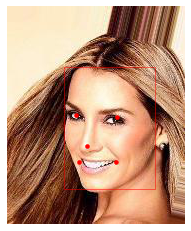

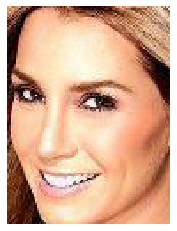

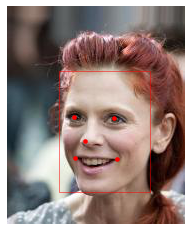

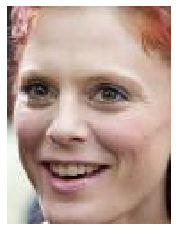

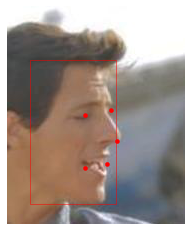

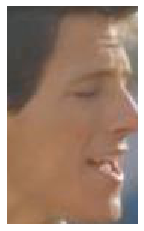

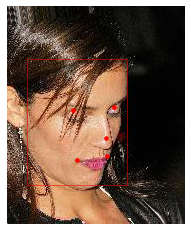

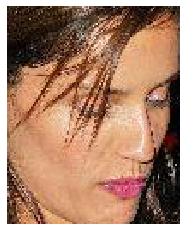

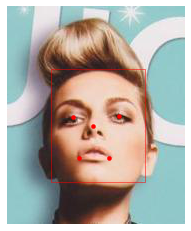

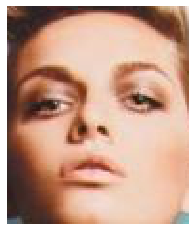

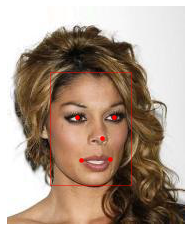

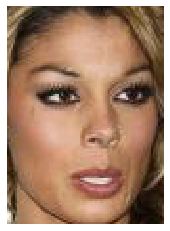

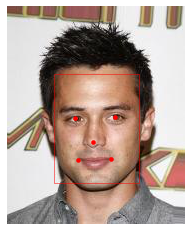

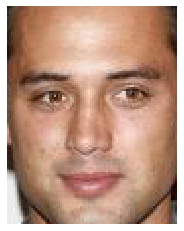

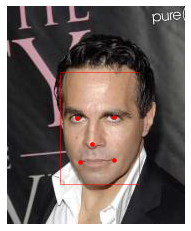

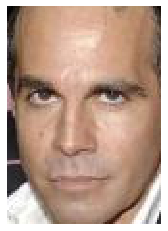

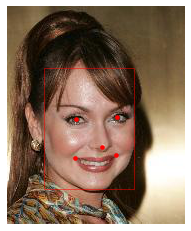

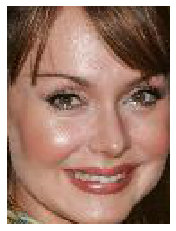

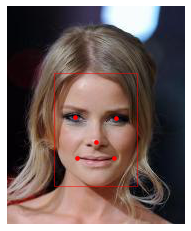

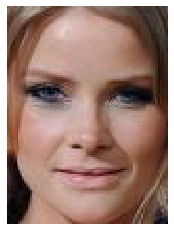

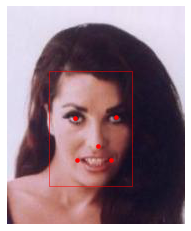

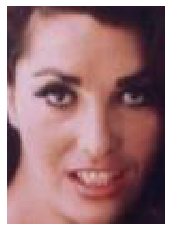

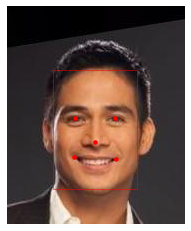

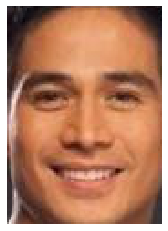

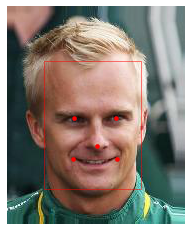

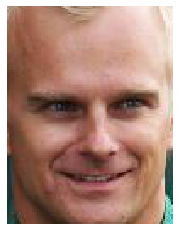

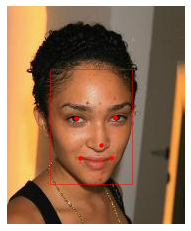

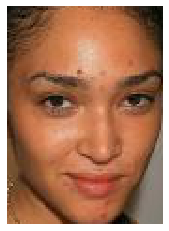

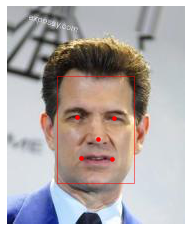

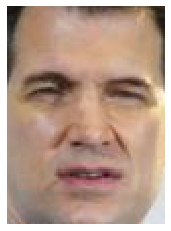

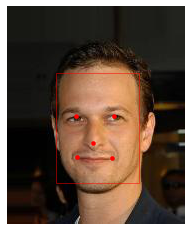

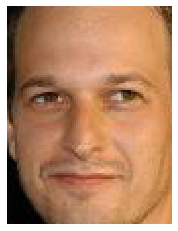

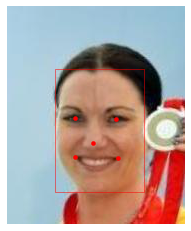

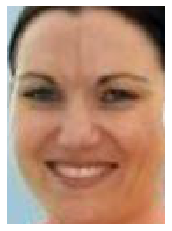

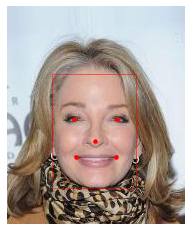

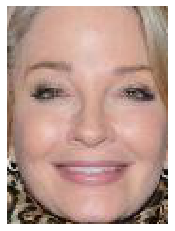

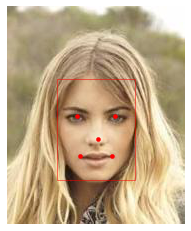

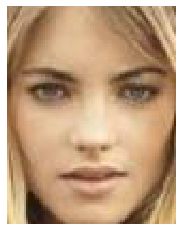

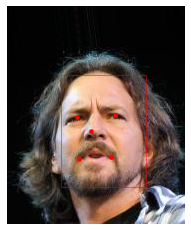

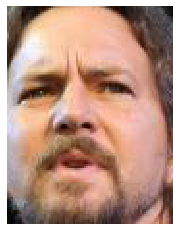

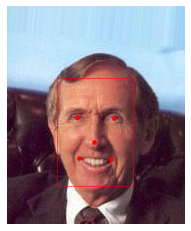

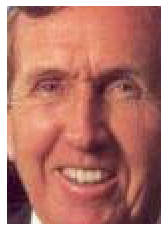

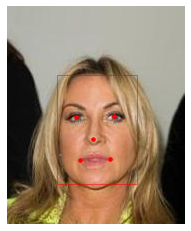

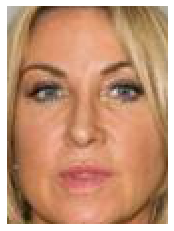

KeyboardInterrupt: 

In [6]:
for filename in allFiles:
    pixels = pyplot.imread(filename)
    detector = MTCNN()
    faces = detector.detect_faces(pixels)
    draw_image_with_boxes(filename, faces)
    draw_faces(filename,faces)